In [4]:
import pandas as pd
import plotly.express as px

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

import seaborn as sns

In [5]:
shots = pd.read_csv('shot_logs.csv', header=0)

In [8]:
repartition = shots.groupby('player_name')['player_id'].count()
repartition = repartition.to_frame().reset_index()
repartition = repartition.rename(columns={'player_id': 'n_shots'})
shot_perc = shots.groupby('player_name')['FGM'].sum()
shot_perc = shot_perc.to_frame().reset_index()
shot_perc = shot_perc.merge(repartition, on='player_name', how='left')
print(repartition.head(5))

       player_name  n_shots
0     aaron brooks      561
1     aaron gordon      104
2  al farouq aminu      258
3       al horford      715
4     al jefferson      800


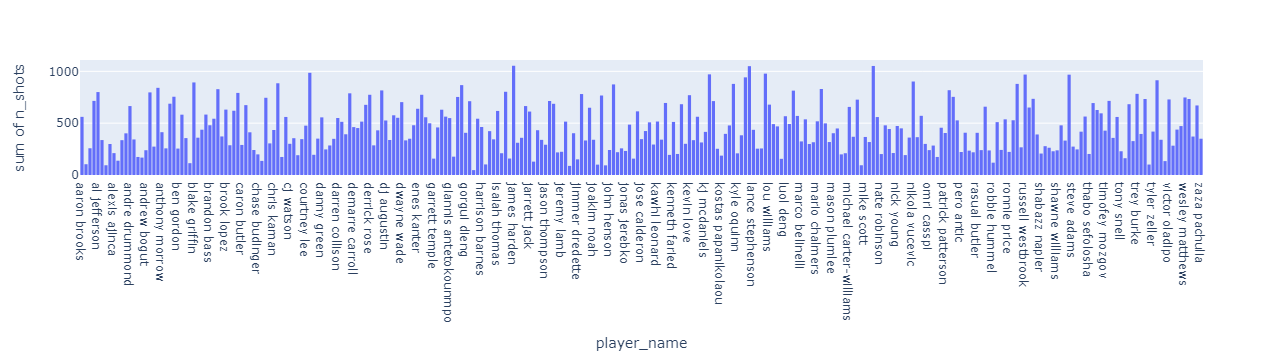

           bin  n_shots
0  < 250 shots       62
1  > 250 shots      111
2  > 500 shots       71
3   >750 shots       37


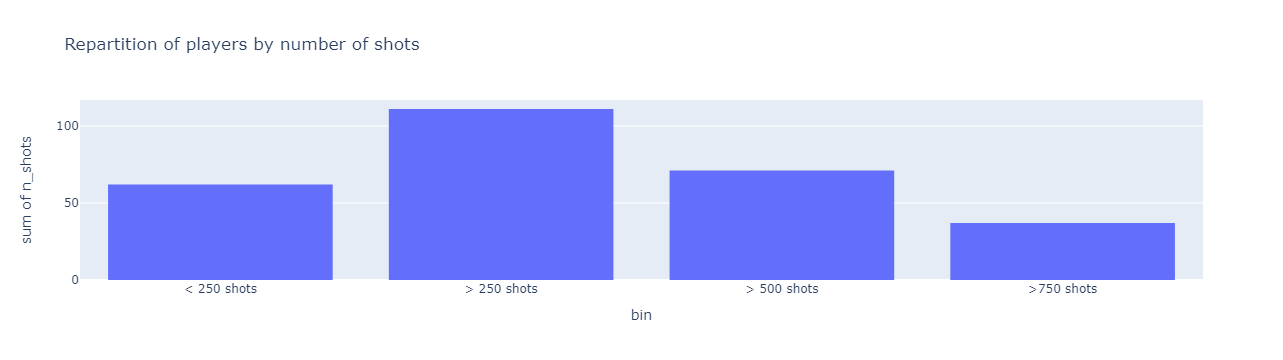

In [9]:
fig = px.histogram(repartition, x='player_name', y='n_shots')
fig.show()

def binning(value):
    if value> 750:
        return '>750 shots'
    elif value > 500:
        return '> 500 shots'
    elif value > 250:
        return '> 250 shots'
    else:
        return '< 250 shots'
    
repartition['bin'] = repartition['n_shots'].apply(binning)

rep_bin = repartition.groupby('bin')['n_shots'].count()
rep_bin = rep_bin.to_frame().reset_index()
print(rep_bin)

fig = px.histogram(rep_bin, x='bin', y='n_shots', title='Repartition of players by number of shots')
fig.show()

In [10]:
sorted_repartition = repartition.sort_values('n_shots', ascending=False)
print(sorted_repartition.head(5))
print(sorted_repartition.tail(5))

           player_name  n_shots         bin
108       james harden     1054  >750 shots
198         mnta ellis     1052  >750 shots
167  lamarcus aldridge     1050  >750 shots
57      damian lillard      986  >750 shots
171       lebron james      978  >750 shots
       player_name  n_shots          bin
195    mike miller       94  < 250 shots
6      alan crabbe       94  < 250 shots
131    joey dorsey       93  < 250 shots
122  jerome jordan       88  < 250 shots
98      greg smith       47  < 250 shots


In [11]:
shot_perc['shot%'] = shot_perc['FGM']/shot_perc['n_shots']*100

shot_perc = shot_perc.sort_values('n_shots', ascending=False)
print(shot_perc.head(5))
fig = px.scatter(shot_perc, x='n_shots', y='shot%', color='bin', title='Players Shot percentages')
fig.show()

           player_name  FGM  n_shots      shot%
108       james harden  474     1054  44.971537
198         mnta ellis  473     1052  44.961977
167  lamarcus aldridge  473     1050  45.047619
57      damian lillard  426      986  43.204868
171       lebron james  478      978  48.875256


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['player_name', 'FGM', 'n_shots', 'shot%'] but received: bin

In [73]:
# plotting two histograms on the same axis
# plt.hist(shot_perc['n_shots'], bins=25, alpha=0.45, color='red')
# plt.hist(shot_perc['shot%'], bins=25, alpha=0.45, color='blue')
  
# plt.title("histogram with #shots and shot% \(overlapping histogram)")
  
# plt.legend(['#shots', 
#             'shots%'])
  
# plt.show()

In [101]:
pts_type = shots.groupby(['PTS_TYPE','SHOT_RESULT'])['W'].count()
pts_type= pts_type.to_frame().reset_index()
pts_type = pts_type.rename(columns={'W': 'count'})
pts_type['type'] = pts_type['PTS_TYPE'].apply(str)
pts_type['type'] = pts_type['type'] + "pts " + pts_type['SHOT_RESULT']
print(pts_type)

   PTS_TYPE SHOT_RESULT  count         type
0         2        made  45990    2pts made
1         2      missed  48183  2pts missed
2         3        made  11915    3pts made
3         3      missed  21981  3pts missed


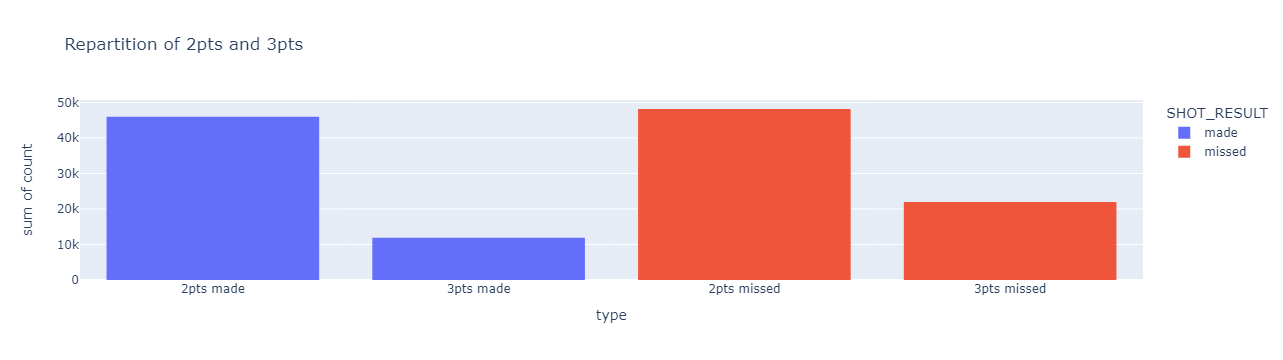

In [103]:
fig = px.histogram(pts_type, x='type', y='count', color='SHOT_RESULT', title='Repartition of 2pts and 3pts')
fig.show()

In [ ]:
fig = px.histogram(sorted_repartition, x='player_name', y='n_shots')
fig.show()

In [ ]:
#2pts shots vs 3pts shots
shot_type = shots
shot_type['type'] = shots['PTS'].apply(str)
shot_type = shots.groupby('type')['W'].count()
shot_type = shot_type.to_frame().reset_index()
fig = px.histogram(shot_type, x='type', y='W')
fig.show()

In [123]:
print(shots[['PTS','SHOT_RESULT']].head(20))

    PTS SHOT_RESULT
0     2        made
1     0      missed
2     0      missed
3     0      missed
4     0      missed
5     0      missed
6     0      missed
7     2        made
8     0      missed
9     0      missed
10    0      missed
11    2        made
12    2        made
13    0      missed
14    0      missed
15    3        made
16    0      missed
17    0      missed
18    3        made
19    0      missed


In [124]:
shots['previous'] = np.zeros(len(shots))
shots['dist_diff'] = np.zeros(len(shots))

for i,row in enumerate(shots[1:].iterrows()):
    if i>0:
        if shots.loc[i,'GAME_ID'] == shots.loc[i-1,'GAME_ID']:
            shots.loc[i,'previous'] = shots.loc[i-1,'SHOT_RESULT']
            shots.loc[i,'dist_diff'] = shots.loc[i,'SHOT_DIST'] - shots.loc[i-1,'SHOT_DIST']

Text(0, 0.5, 'Cumulative Density Function')

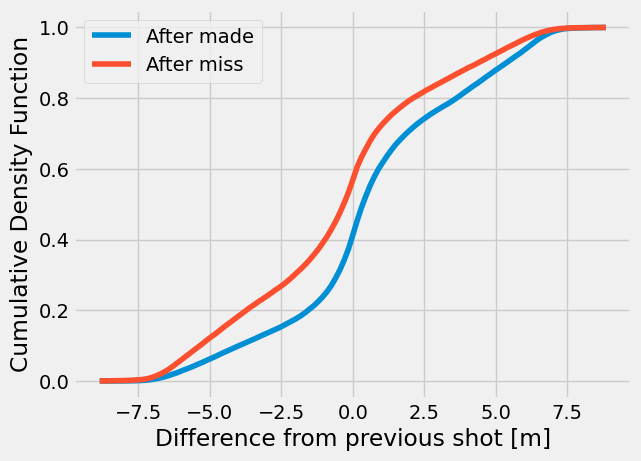

In [127]:
after_made = shots[shots.previous == 'made']
after_miss = shots[shots.previous =='missed']

bins = np.arange(-30,30,0.5)
x = after_made.dist_diff
y = after_miss.dist_diff

h1 = np.histogram(after_made.dist_diff,bins)
h2 = np.histogram(after_miss.dist_diff,bins)
hist_1 = np.true_divide(h1[0],sum(h1[0]))
hist_2 = np.true_divide(h2[0],sum(h2[0]))
cumu_1 = []
cumu_1.append(0)
cumu_2 = []
cumu_2.append(0)

for i,item in enumerate(hist_1):
    if i>0:
        cumu_1.append(cumu_1[i-1] + hist_1[i])
        cumu_2.append(cumu_2[i-1] + hist_2[i])
        
plt.plot(bins[1:]*0.3,cumu_1)
plt.plot(bins[1:]*0.3,cumu_2)
plt.legend(['After made','After miss'], loc = 2)
plt.xlabel('Difference from previous shot [m]')
plt.ylabel('Cumulative Density Function')

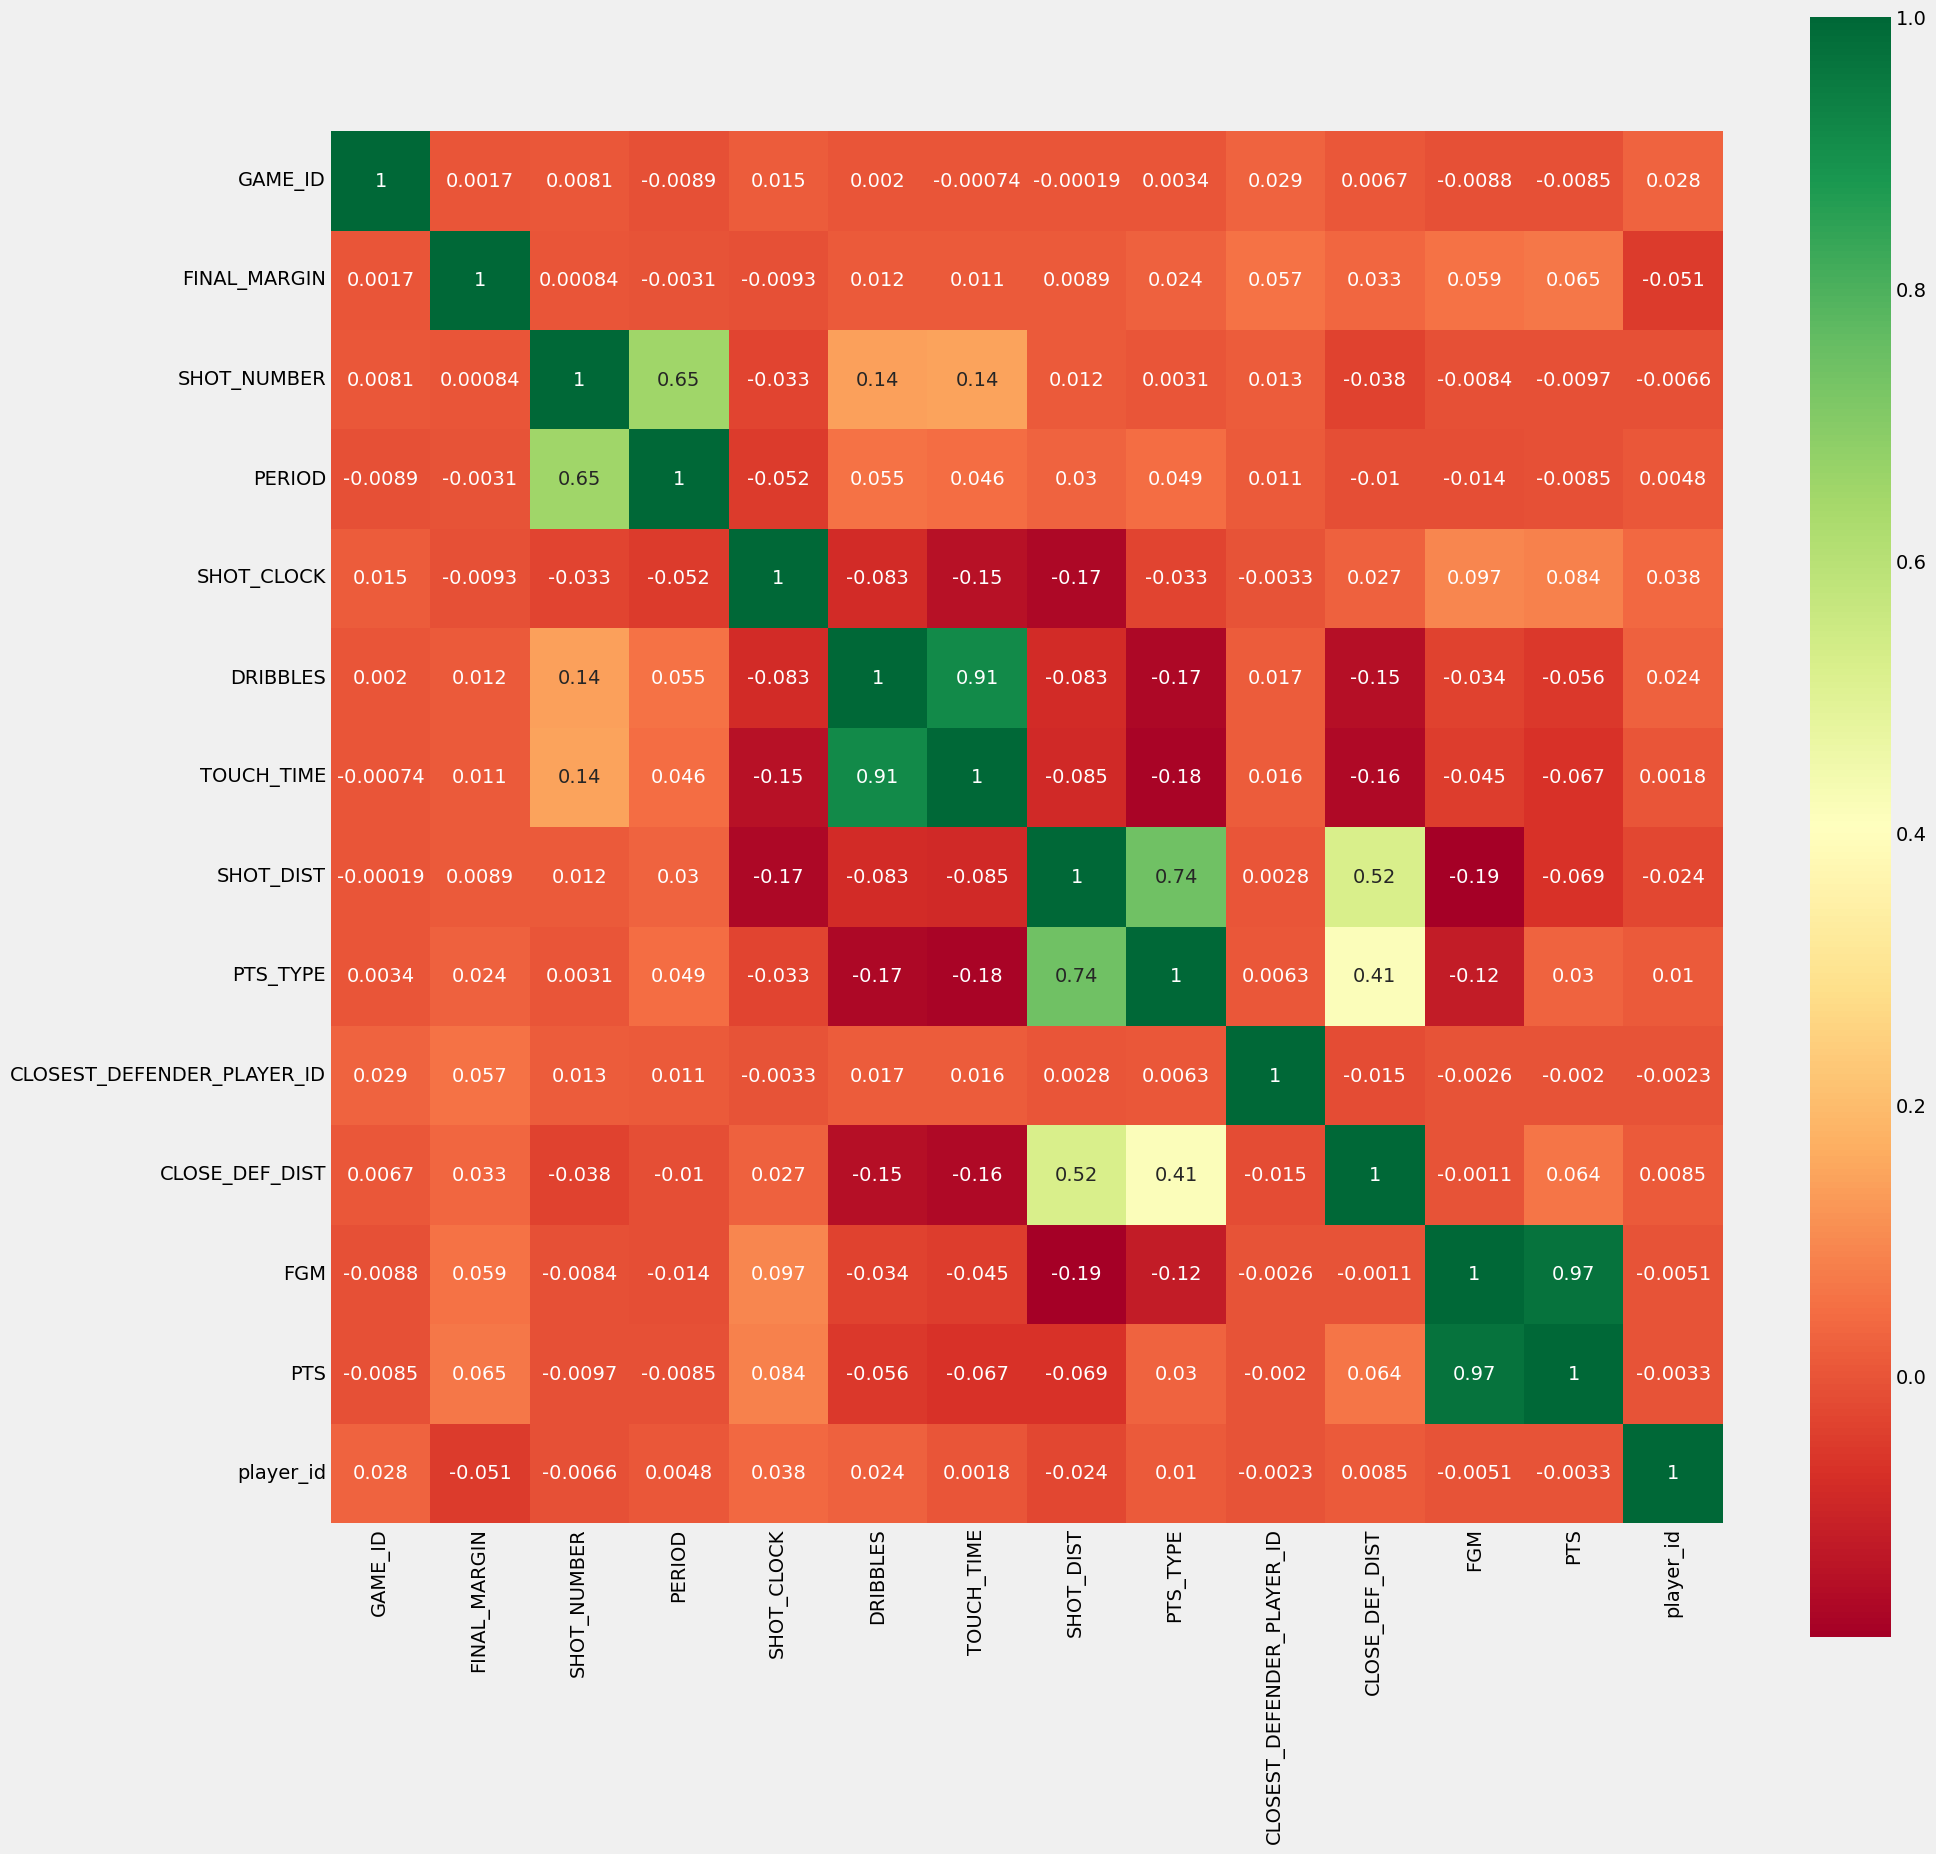

In [12]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(shots.corr(), annot=True,cmap='RdYlGn',square=True) 

In [120]:
james_harden = shots[shots['player_name'] == 'james harden']
james_harden = james_harden.sort_values('SHOT_NUMBER', ascending=False)
james_harden

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
92896,21400327,"DEC 11, 2014 - HOU @ SAC",A,W,4,32,5,2:22,13.8,8,...,1.5,2,made,"Thompson, Jason",201574,4.5,1,2,james harden,201935
93029,21400217,"NOV 26, 2014 - HOU vs. SAC",H,W,13,31,4,0:50,3.2,13,...,20.6,2,made,"McLemore, Ben",203463,4.4,1,2,james harden,201935
92895,21400327,"DEC 11, 2014 - HOU @ SAC",A,W,4,31,5,2:51,0.0,14,...,10.4,2,missed,"McLemore, Ben",203463,3.4,0,0,james harden,201935
92894,21400327,"DEC 11, 2014 - HOU @ SAC",A,W,4,30,5,3:36,13.0,10,...,2.7,2,made,"Thompson, Jason",201574,3.4,1,2,james harden,201935
93028,21400217,"NOV 26, 2014 - HOU vs. SAC",H,W,13,30,4,2:08,22.2,1,...,3.8,2,made,"Sessions, Ramon",201196,16.5,1,2,james harden,201935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92759,21400411,"DEC 22, 2014 - HOU vs. POR",H,W,15,1,1,9:44,3.9,2,...,11.3,2,made,"Matthews, Wesley",202083,4.2,1,2,james harden,201935
93153,21400069,"NOV 06, 2014 - HOU vs. SAS",H,W,17,1,1,6:33,5.2,8,...,13.3,2,missed,"Green, Danny",201980,4.4,0,0,james harden,201935
92785,21400396,"DEC 20, 2014 - HOU vs. ATL",H,L,-7,1,1,4:54,10.5,12,...,19.4,2,missed,"Carroll, DeMarre",201960,4.5,0,0,james harden,201935
92801,21400380,"DEC 18, 2014 - HOU vs. NOP",H,L,-9,1,1,10:56,2.1,5,...,19.7,2,missed,"Holiday, Jrue",201950,4.2,0,0,james harden,201935


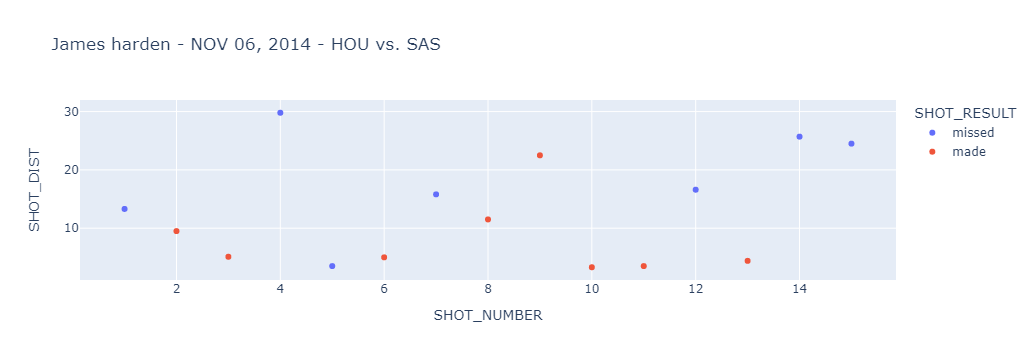

In [122]:
james_harden = james_harden[james_harden['GAME_ID']==21400069]
fig = px.scatter(james_harden, x='SHOT_NUMBER', y='SHOT_DIST', color='SHOT_RESULT', title='James harden - NOV 06, 2014 - HOU vs. SAS')
fig.show()

In [71]:
# # import pandas as pd
# # import plotly.express as px

# # read in the data
# df = pd.read_csv('shot_logs.csv')

# # filter out missed shots and free throws
# df = df[(df['SHOT_RESULT'] != 'missed') & (df['PTS_TYPE'] != 1)]

# # count the number of blocked shots for each player
# blocks_by_player = df.groupby('player_name')['FGM'].sum() - df.groupby('player_name')['PTS'].sum()

# # create a bar chart showing the top 10 players by number of blocked shots
# fig = px.bar(blocks_by_player.nlargest(10), x=blocks_by_player.nlargest(10).index, y=blocks_by_player.nlargest(10).values)
# fig.show()
